In [1]:
import json
from collections import defaultdict

##### 读取数据

In [2]:
cate = 'Books'  #Amozon商品类别
cut_len = 21   # 截断长度

In [3]:
file_dict = defaultdict(list)
with open('./Data/' + cate + '_5.json') as f:
    for line in f.readlines():
        dic = json.loads(line)
        file_dict[dic['reviewerID']].append([dic['asin'], dic['unixReviewTime']])

##### 数据分布

In [4]:
import matplotlib.pyplot as plt

In [5]:
interaction_before_truncation = 0
x_list = list(range(5,cut_len+2)) # 5--cut_len, 大于cut_len
y_list = [0]*len(x_list)
for k, v in file_dict.items():
    interaction_before_truncation += len(v)
    if(len(v) <= cut_len):
        y_list[len(v)-5] += 1
    else:
        y_list[-1] += 1

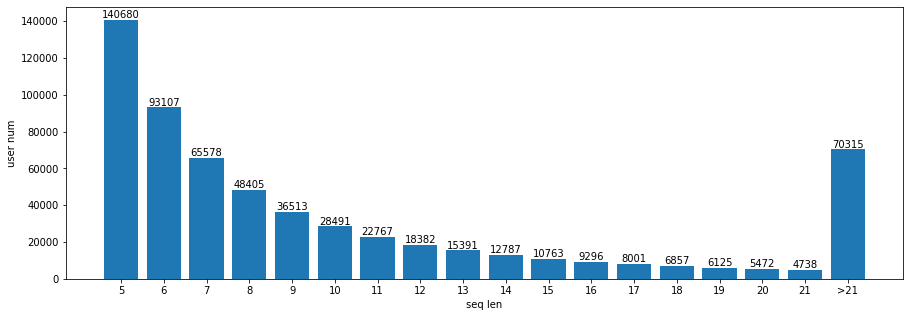

In [6]:
plt.figure(figsize=(15,5))
plt.bar(x_list,y_list)
x_tag = [str(x) for x in range(5,cut_len+1)]
x_tag.append('>'+str(cut_len))
plt.xticks(x_list, x_tag)
plt.xlabel("seq len")
plt.ylabel("user num")
for x,y in zip(x_list, y_list):
    plt.text(x, y+0.1, "%d"%y, ha='center', va='bottom', fontsize=10)
plt.show()

##### 截断

In [7]:
'''按时间排序'''
for k, v in file_dict.items():
    v.sort(key = lambda x: x[1])
'''取item项，并截断至cut_len'''
file_list = []
for k,v in file_dict.items():
    file_list.append([x[0] for x in v][:cut_len])      
'''item to id'''
item_set = set()
for l in file_list:
    item_set.update(l)
item_to_id = dict(zip(item_set, range(len(item_set))))
item2id_json = json.dumps(item_to_id)
'''保存 item_id 对应关系'''
with open('./Data/' + cate + '_item2id.json','w') as item2id_f:
    item2id_f.write(item2id_json)

In [8]:
'''得到 seq_list，并按长度排序'''
seq_list = []
for l in file_list:
    seq_list.append([str(item_to_id[x])+' ' for x in l])
seq_list.sort(key=len)

In [9]:
'''统计 interaction_after_truncation'''
interaction_after_truncation = 0
for l in seq_list:
    interaction_after_truncation += len(l)

In [10]:
'''seq list 写入文件'''
with open('./Data/' + cate + '_seqs.txt','w') as seqs_f:
    for l in seq_list:
        seqs_f.writelines(l)
        seqs_f.write('\r')

##### Data_info.xlsx 中记录信息

In [11]:
len(seq_list), len(item_set), interaction_before_truncation, interaction_after_truncation, interaction_before_truncation-interaction_after_truncation

(603668, 364315, 8898041, 5943529, 2954512)